Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing Dataset

In [3]:
data = pd.read_csv(r'C:\Users\piran\Downloads\Sparks Intern\Task 3\SampleSuperstore.csv')

Analysing Input Data and Preprocessing

In [4]:
data.shape

(9994, 13)

In [5]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [11]:
data["Country"].unique()

array(['United States'], dtype=object)

In [13]:
data["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [22]:
data["Postal Code"].unique().size

631

In [17]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [32]:
data['Location'] = loss['City'].astype(str)+","+loss['State'].astype(str)

Analysing Loss

Analysing Loss wrt to Category of items sold and Location sold at

In [52]:
loss_loc_cat = data.groupby(["Location","Category"]).sum()["Profit"]
loss_loc_cat

Location                Category       
Abilene,Texas           Office Supplies     -3.7584
Akron,Ohio              Furniture          -75.8304
                        Office Supplies    -96.9932
                        Technology        -186.7439
Albuquerque,New Mexico  Technology          -5.6943
                                             ...   
Yonkers,New York        Furniture         -264.9208
York,Pennsylvania       Furniture          -18.0882
                        Office Supplies   -107.8552
Yuma,Arizona            Office Supplies    -35.8848
                        Technology        -479.9880
Name: Profit, Length: 428, dtype: float64

We group categories and states and analyse the profit. Sales of certain category in certain states aren't profitable and can be discontinued. For example, sales of furniture in Akron,Ohio results in loss and can be discontinued to avoid further loss

In [54]:
#Listing out all the unprofitable ventures currently being done
loss_loc_cat = loss_loc_cat[loss_loc_cat < 0].sort_values()
loss_loc_cat

Location                   Category       
Houston,Texas              Office Supplies   -10187.9579
Chicago,Illinois           Office Supplies    -7536.5801
Philadelphia,Pennsylvania  Furniture          -7358.6039
Lancaster,Ohio             Technology         -6864.3457
Philadelphia,Pennsylvania  Technology         -6118.7738
                                                 ...    
Aurora,Illinois            Technology            -0.6265
Brownsville,Texas          Office Supplies       -0.3488
Tigard,Oregon              Furniture             -0.3398
Allen,Texas                Technology            -0.2685
Coppell,Texas              Office Supplies       -0.2098
Name: Profit, Length: 428, dtype: float64

<AxesSubplot:xlabel='Location,Category'>

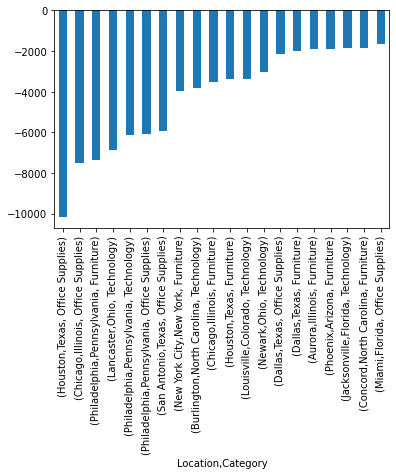

In [58]:
#Plotting the top 20 loss-causing ventures of the company based on location and category
loss_loc_cat.head(20).plot.bar()

Analysing loss wrt to location and segment of consumer

In [75]:
loss_loc_seg = data.groupby(["Location","Segment"]).sum()["Profit"]
loss_loc_seg = loss_loc_seg[loss_loc_seg<0].sort_values()
loss_loc_seg

Location                   Segment    
Houston,Texas              Consumer      -10703.1477
Philadelphia,Pennsylvania  Consumer       -9753.8502
San Antonio,Texas          Consumer       -7154.7878
Lancaster,Ohio             Consumer       -6959.5034
Philadelphia,Pennsylvania  Corporate      -6243.3656
                                             ...    
Waco,Texas                 Corporate         -0.9452
Homestead,Florida          Consumer          -0.6624
Lorain,Ohio                Home Office       -0.6435
Loveland,Colorado          Consumer          -0.6048
Coppell,Texas              Consumer          -0.2098
Name: Profit, Length: 418, dtype: float64

<AxesSubplot:xlabel='Location,Segment'>

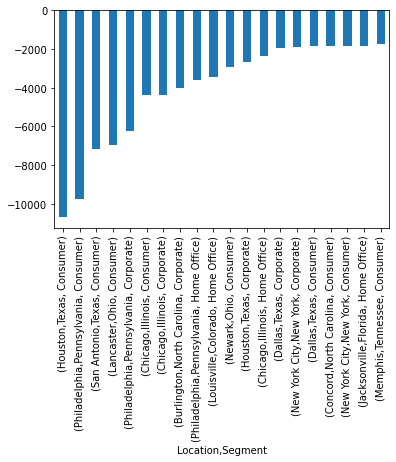

In [72]:
#Plotting the top 20 loss-causing ventures of the company based on location and segment
loss_loc_seg.head(20).plot.bar()

In [100]:
loss_sub_cat_seg = data.groupby(["Sub-Category","Segment"]).sum()["Profit"]
loss_sub_cat_seg = loss_sub_cat_seg[loss_sub_cat_seg < 0]
loss_sub_cat_seg

Sub-Category  Segment    
Bookcases     Consumer      -4435.6382
Supplies      Consumer      -1657.5513
Tables        Consumer      -9728.0378
              Corporate     -4906.4986
              Home Office   -3090.9447
Name: Profit, dtype: float64

Supplying bookcases to consumers is unprofitable and so is the sale of other sub-categories in the segments mentioned above. Thus these can be cut down to minimize losses.

Investment Prioritization

<AxesSubplot:ylabel='Profit'>

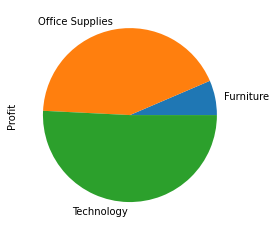

In [82]:
cat_share = data.groupby("Category").sum()["Profit"]
cat_share.plot.pie()

Technology related sales rake in the most profit for the company and it should be given higher priority with regards to investmnet.

In [91]:
state_share = data.groupby("State").sum()["Profit"]
state_share.sort_values(ascending=False)

State
California              76381.3871
New York                74038.5486
Washington              33402.6517
Michigan                24463.1876
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.0566
New Hampshire 

California and New York bring in the most profit and thus must be provided with more investment.

In [110]:
sub_cat_state = data.groupby(["State","Sub-Category"]).sum()["Profit"]
sub_cat_state = sub_cat_state[sub_cat_state>1000].sort_values(ascending = False)
sub_cat_state

State          Sub-Category
New York       Machines        17320.0762
               Phones          13399.1892
               Binders         11096.0260
California     Accessories     11095.6565
Michigan       Binders         11079.5050
                                  ...    
Washington     Furnishings      1054.8443
Virginia       Furnishings      1024.6200
Massachusetts  Phones           1016.1553
Vermont        Bookcases        1013.1270
Massachusetts  Binders          1000.7748
Name: Profit, Length: 95, dtype: float64

The sale of above sub-categories in these states can be invested in to get better returns.

<AxesSubplot:>

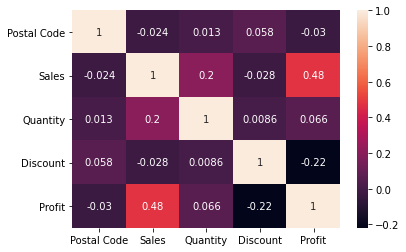

In [111]:
sns.heatmap(data.corr(),annot = True)

From the above heatmap, the negative correlation between profit and discount is clearly visible. Thus it is imperative to cut down discount and offer discount only to the most valued customers.